**In the random generator I used my seed integer to be 9149**

In [1]:
import matplotlib.pylab as plt
import numpy as np
import math
#importing relevant libraries

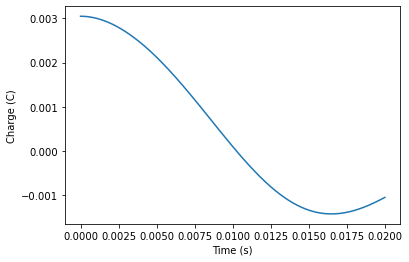

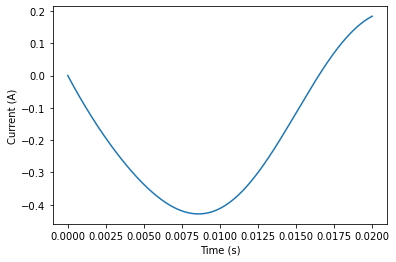

In [2]:
# Define the parameters
L = 90e-3  # inductance in Henry
R = 10  # resistance in Ohm
C = 305e-6  # capacitance in Farad
Q0 = 3.05e-3  # initial charge in Coulomb

# Define the function f that computes the derivative of Q and I
def f(t, y):
    Q, I = y
    dQdt = I
    dIdt = -(R/L) * dQdt - (1/(L*C)) * Q + (1/L) * V(t)
    return [dQdt, dIdt]

# Define the function V that describes the input voltage V(t)
def V(t):
    return 2 * np.cos(2 * np.pi * 60 *t)

# Define the time step and the time array
dt = 1e-6  # time step in seconds
t = np.arange(0, 0.02, dt)  # time array from 0 to 0.02 seconds

# Initialize the arrays for Q and I, with shape of t
Q = np.zeros_like(t)
I = np.zeros_like(t)

# Set the initial values
Q[0] = Q0
I[0] = 0

'''Implementing the RK4 method: listing out procedures k1 - k4,
which will help calculate the slopes at 4 points the weighted sum is then
calculated'''

for i in range(len(t) - 1):
    k1 = dt * np.array(f(t[i], [Q[i], I[i]]))
    k2 = dt * np.array(f(t[i] + 0.5*dt, [Q[i] + 0.5*k1[0], I[i] + 0.5*k1[1]]))
    k3 = dt * np.array(f(t[i] + 0.5*dt, [Q[i] + 0.5*k2[0], I[i] + 0.5*k2[1]]))
    k4 = dt * np.array(f(t[i] + dt, [Q[i] + k3[0], I[i] + k3[1]]))
    Q[i+1] = Q[i] + (1/6)*(k1[0] + 2*k2[0] + 2*k3[0] + k4[0])
    I[i+1] = I[i] + (1/6)*(k1[1] + 2*k2[1] + 2*k3[1] + k4[1])

# Plot the results
plt.plot(t, Q)
plt.xlabel('Time (s)')
plt.ylabel('Charge (C)')
plt.show()

plt.plot(t, I)
plt.xlabel('Time (s)')
plt.ylabel('Current (A)')
plt.show()


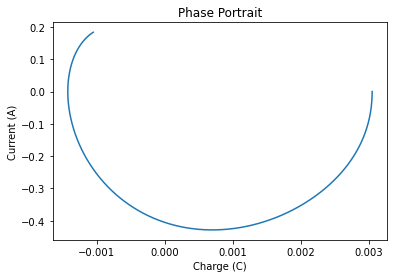

In [8]:
plt.plot(Q, I)
plt.xlabel('Charge (C)')
plt.ylabel('Current (A)')
plt.title('Phase Portrait')
plt.show()